In [1]:
!pip install tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
     

In [2]:
path = "C:/Users/Malathi M/OneDrive/Documents/MDTE25/capstone project/Project 5/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat"

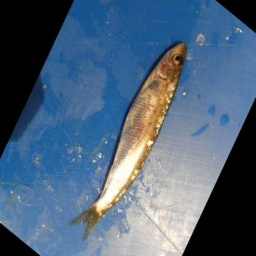

In [3]:
image = Image.open('C:/Users/Malathi M/OneDrive/Documents/MDTE25/capstone project/Project 5/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/00JL3HEP2KW2.jpg')
image

In [4]:
image.size

(256, 256)

Data argumentation and preprocessing

In [14]:
# Only training generator needs augmentation
train_gen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)
     

In [15]:
# Validation generator should NOT apply augmentation
val_gen = ImageDataGenerator(rescale=1./255.)

In [16]:
# Train data
train_data = train_gen.flow_from_directory(
    "C:/Users/Malathi M/OneDrive/Documents/MDTE25/capstone project/Project 5/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Validation data
val_data = val_gen.flow_from_directory(
    "C:/Users/Malathi M/OneDrive/Documents/MDTE25/capstone project/Project 5/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
) 

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [17]:
print(train_data.class_indices)
print(train_data.classes)

{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
[ 0  0  0 ... 10 10 10]


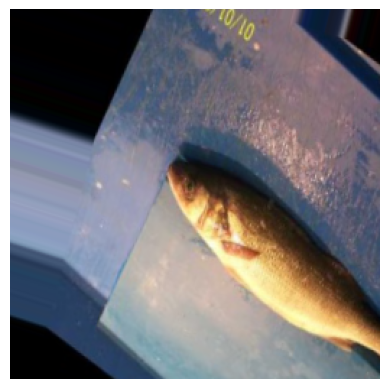

One-hot label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Class index: 7
Class name: fish sea_food sea_bass


In [22]:
import matplotlib.pyplot as plt

# Get one batch
image, label = next(train_data)

# Show the first image
plt.imshow(image[0])
plt.axis('off')  # optional: remove axis
plt.show()

# Print the one-hot encoded label
print("One-hot label:", label[0])

# Convert one-hot to class index
print("Class index:", label[0].argmax())

# Optional: print class name
class_map = {v: k for k, v in train_data.class_indices.items()}
print("Class name:", class_map[label[0].argmax()])


In [23]:
input_shape = (256, 256, 3)
num_classes = train_data.num_classes

Model Traning

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = train_data.num_classes

model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


c:\Users\Malathi M\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.3843 - loss: 1.7411 - val_accuracy: 0.6016 - val_loss: 1.1569
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.5688 - loss: 1.1491 - val_accuracy: 0.7088 - val_loss: 0.8459
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6569 - loss: 0.9180 - val_accuracy: 0.7399 - val_loss: 0.6911
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.7152 - loss: 0.7883 - val_accuracy: 0.7811 - val_loss: 0.6225
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7733 - loss: 0.6404 - val_accuracy: 0.8736 - val_loss: 0.3945
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.8223 - loss: 0.5167 - val_accuracy: 0.8984 - val_loss: 0.3560
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.8278 - loss: 0.4875 - val_accuracy: 0.9185 - val_loss: 0.2664
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.8530 - loss: 0.4132 - val_accu

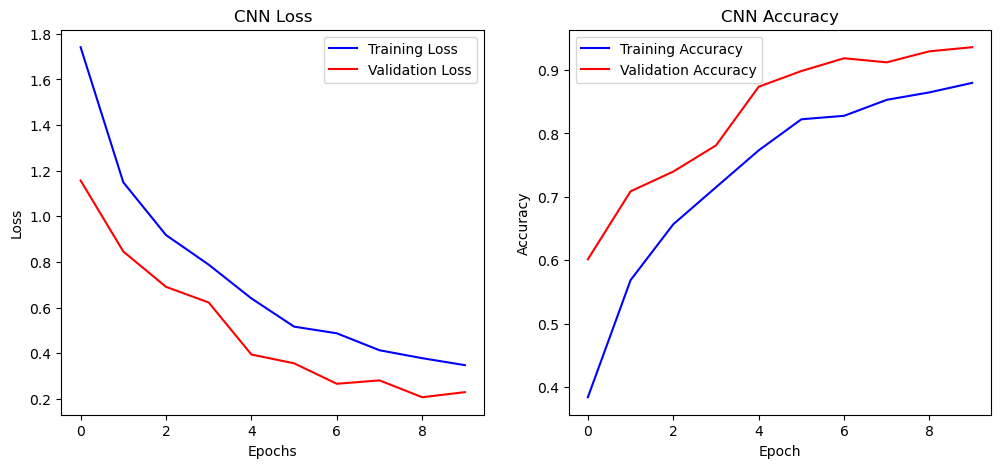

In [28]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss',color = "blue")
plt.plot(history_cnn.history['val_loss'], label='Validation Loss',color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy',color = "blue")
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy',color = "red")
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, InceptionV3, EfficientNetB0


train pre tained model

In [30]:
def build_transfer_model(base_model, num_classes):
    base_model.trainable = False  # freeze the base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [31]:
input_shape = (256, 256, 3)  # adjust to your dataset
num_classes = train_data.num_classes  # from your generator

pretrained_models = {
    "VGG16": VGG16(include_top=False, input_shape=input_shape, weights='imagenet'),
    "ResNet50": ResNet50(include_top=False, input_shape=input_shape, weights='imagenet'),
    "MobileNetV2": MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet'),
    "InceptionV3": InceptionV3(include_top=False, input_shape=input_shape, weights='imagenet'),
    "EfficientNetB0": EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')
}


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


C:\Users\Malathi M\AppData\Local\Temp\ipykernel_9612\832686593.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet'),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [32]:
trained_models = {}
histories = {}

for name, base in pretrained_models.items():
    print(f"\nTraining {name}...")
    model = build_transfer_model(base, num_classes)
    
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=10,
        verbose=1
    )
    
    trained_models[name] = model
    histories[name] = history.history



Training VGG16...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 812s 4s/step - accuracy: 0.3947 - loss: 1.7609 - val_accuracy: 0.7079 - val_loss: 1.0278
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 654s 3s/step - accuracy: 0.6598 - loss: 0.9813 - val_accuracy: 0.8663 - val_loss: 0.5422
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 679s 3s/step - accuracy: 0.7614 - loss: 0.6802 - val_accuracy: 0.8956 - val_loss: 0.3798
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - accuracy: 0.8222 - loss: 0.5167 - val_accuracy: 0.9277 - val_loss: 0.2759
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 664s 3s/step - accuracy: 0.8477 - loss: 0.4355 - val_accuracy: 0.9258 - val_loss: 0.2399
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 663s 3s/step - accuracy: 0.8686 - loss: 0.3804 - val_accuracy: 0.9332 - val_loss: 0.2283
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - accuracy: 0.8884 - loss: 0.3389 - val_accuracy: 0.9405 - val_loss: 0.1939
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.8900 - loss

Fine tune pretained model

In [38]:
def fine_tune(model, base_model, layers_to_unfreeze=10):
    base_model.trainable = True
    for layer in base_model.layers[:-layers_to_unfreeze]:
        layer.trainable = False

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=3
    )
    return history


In [39]:
for name, base in pretrained_models.items():
    print(f"Fine-tuning {name}...")
    fine_tune(trained_models[name], base)


Fine-tuning VGG16...
Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 1751s 9s/step - accuracy: 0.9430 - loss: 0.1703 - val_accuracy: 0.9789 - val_loss: 0.0705
Epoch 2/3
 41/195 ━━━━━━━━━━━━━━━━━━━━ 22:25 9s/step - accuracy: 0.9580 - loss: 0.1162

KeyboardInterrupt: 

In [40]:
# Include CNN model in the trained_models dictionary
trained_models['CNN'] = model_cnn
histories['CNN'] = history_cnn.history

best_acc = 0
best_model_name = ""
best_model = None

# Evaluate all models on validation data
for name, model in trained_models.items():
    loss, acc = model.evaluate(val_data, verbose=0)
    print(f"{name} Accuracy: {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_model_name = name
        best_model = model

print(f"\nBest Model: {best_model_name} with Accuracy: {best_acc:.4f}")

# Save the best model as .h5
best_h5_path = f"best_fish_model_{best_model_name}.h5"
best_model.save(best_h5_path)
print(f"Best model saved as: {best_h5_path}")

# Save metadata in .pkl
import pickle
with open("best_model_info.pkl", "wb") as f:
    pickle.dump({"best_model_name": best_model_name, "best_accuracy": float(best_acc)}, f)
print("Metadata saved as best_model_info.pkl")


VGG16 Accuracy: 0.9853
ResNet50 Accuracy: 0.2839
MobileNetV2 Accuracy: 0.9899
InceptionV3 Accuracy: 0.9744
EfficientNetB0 Accuracy: 0.1712


CNN Accuracy: 0.9359

Best Model: MobileNetV2 with Accuracy: 0.9899
Best model saved as: best_fish_model_MobileNetV2.h5
Metadata saved as best_model_info.pkl


Model evaluvation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


generate prediction for validation data

In [42]:
# Get true labels
y_true = val_data.classes
class_names = list(val_data.class_indices.keys())

# Function to get predicted class labels
def get_predictions(model, val_gen):
    val_gen.reset()  # reset iterator
    y_pred_prob = model.predict(val_gen, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    return y_pred


evaluvate metrics for each model


===== Evaluation for VGG16 =====


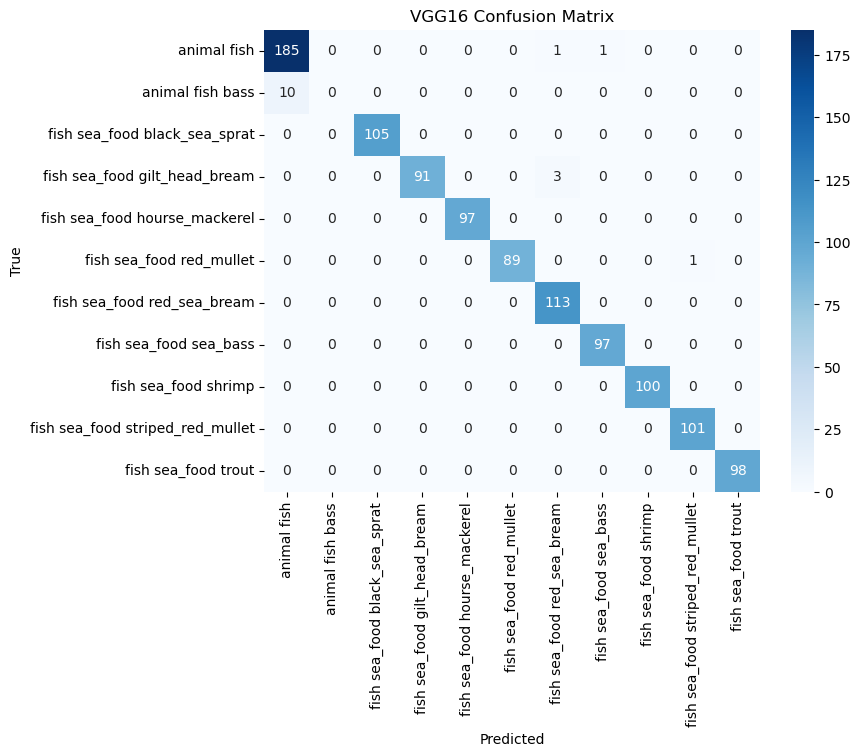

c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.95      0.99      0.97       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       1.00      0.97      0.98        94
   fish sea_food hourse_mackerel       1.00      1.00      1.00        97
        fish sea_food red_mullet       1.00      0.99      0.99        90
     fish sea_food red_sea_bream       0.97      1.00      0.98       113
          fish sea_food sea_bass       0.99      1.00      0.99        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       0.99      1.00      1.00       101
             fish sea_food trout       1.00      1.00      1.00        98

                        accuracy                           0.99      1092
                       macro avg    

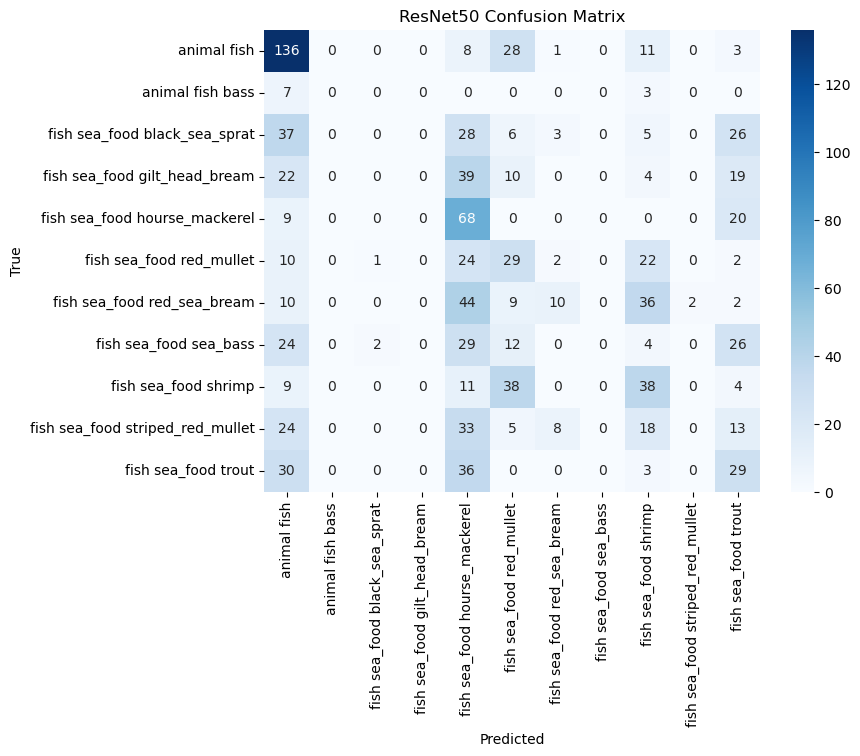

c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.43      0.73      0.54       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.21      0.70      0.33        97
        fish sea_food red_mullet       0.21      0.32      0.26        90
     fish sea_food red_sea_bream       0.42      0.09      0.15       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.26      0.38      0.31       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.20      0.30      0.24        98

                        accuracy                           0.28      1092
                       macro avg    

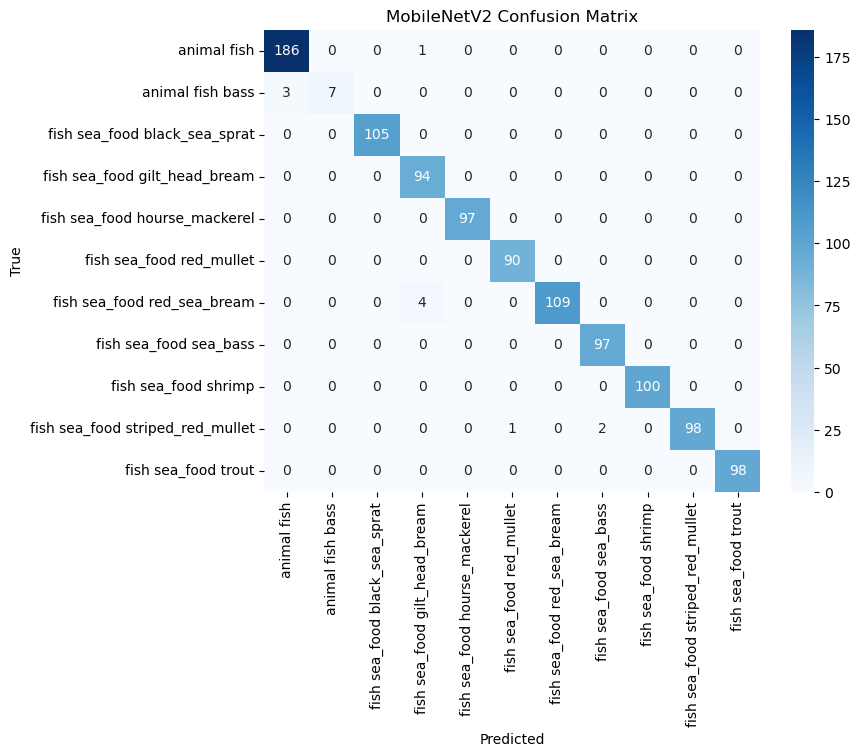

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       187
                animal fish bass       1.00      0.70      0.82        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       0.95      1.00      0.97        94
   fish sea_food hourse_mackerel       1.00      1.00      1.00        97
        fish sea_food red_mullet       0.99      1.00      0.99        90
     fish sea_food red_sea_bream       1.00      0.96      0.98       113
          fish sea_food sea_bass       0.98      1.00      0.99        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       1.00      0.97      0.98       101
             fish sea_food trout       1.00      1.00      1.00        98

                        accuracy                           0.99      1092
                       macro avg    

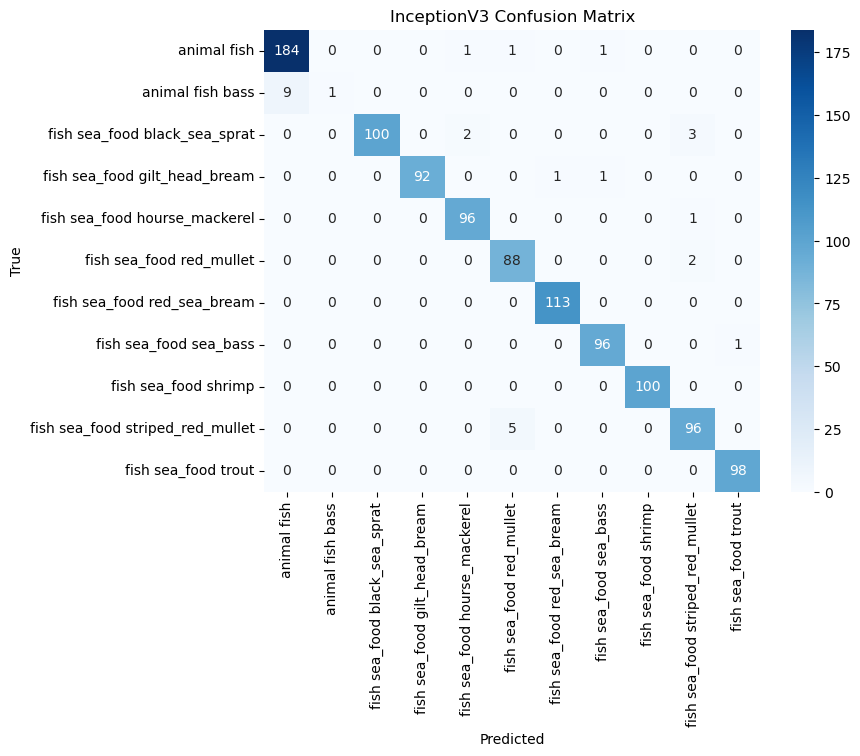

                                  precision    recall  f1-score   support

                     animal fish       0.95      0.98      0.97       187
                animal fish bass       1.00      0.10      0.18        10
   fish sea_food black_sea_sprat       1.00      0.95      0.98       105
   fish sea_food gilt_head_bream       1.00      0.98      0.99        94
   fish sea_food hourse_mackerel       0.97      0.99      0.98        97
        fish sea_food red_mullet       0.94      0.98      0.96        90
     fish sea_food red_sea_bream       0.99      1.00      1.00       113
          fish sea_food sea_bass       0.98      0.99      0.98        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       0.94      0.95      0.95       101
             fish sea_food trout       0.99      1.00      0.99        98

                        accuracy                           0.97      1092
                       macro avg    

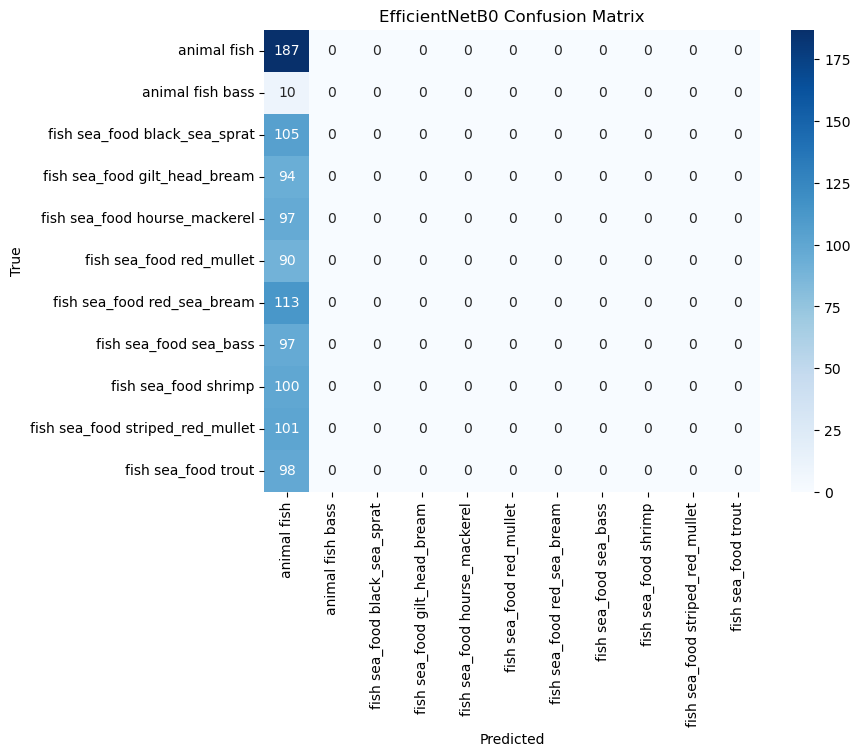

c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17      1092
                       macro avg    

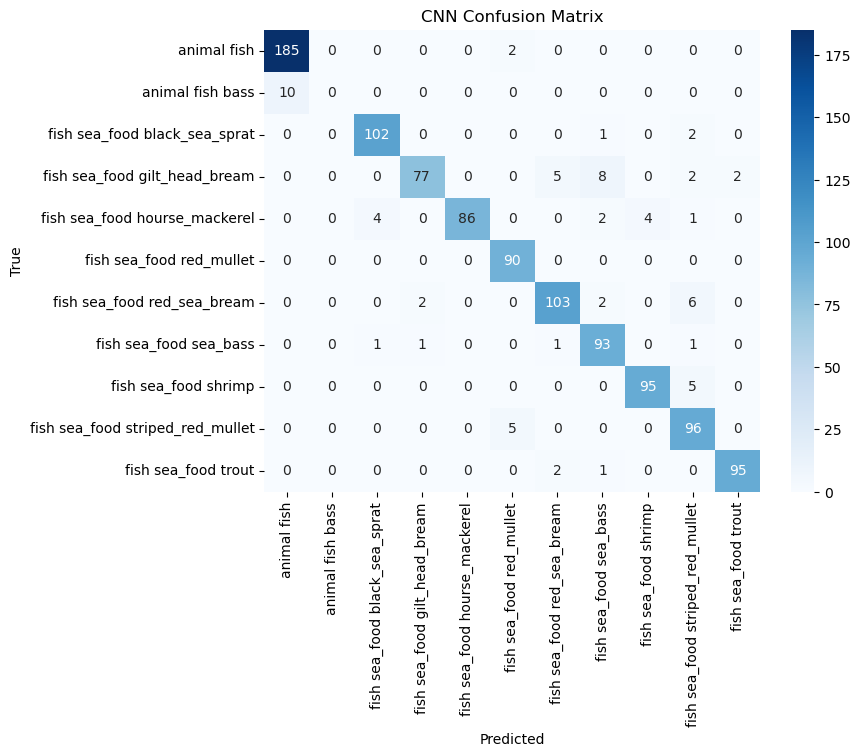

                                  precision    recall  f1-score   support

                     animal fish       0.95      0.99      0.97       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.95      0.97      0.96       105
   fish sea_food gilt_head_bream       0.96      0.82      0.89        94
   fish sea_food hourse_mackerel       1.00      0.89      0.94        97
        fish sea_food red_mullet       0.93      1.00      0.96        90
     fish sea_food red_sea_bream       0.93      0.91      0.92       113
          fish sea_food sea_bass       0.87      0.96      0.91        97
            fish sea_food shrimp       0.96      0.95      0.95       100
fish sea_food striped_red_mullet       0.85      0.95      0.90       101
             fish sea_food trout       0.98      0.97      0.97        98

                        accuracy                           0.94      1092
                       macro avg    

c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
for name, model in trained_models.items():
    print(f"\n===== Evaluation for {name} =====")
    y_pred = get_predictions(model, val_data)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=class_names))


visuvalize training history

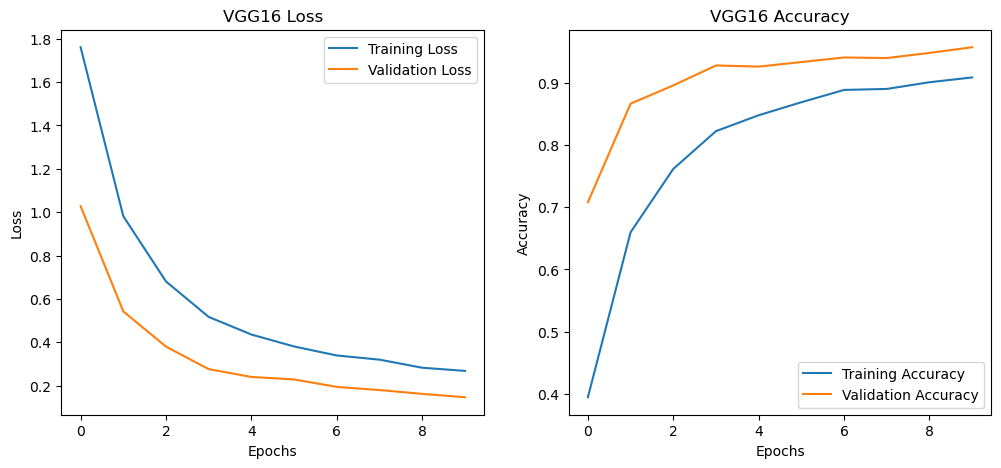

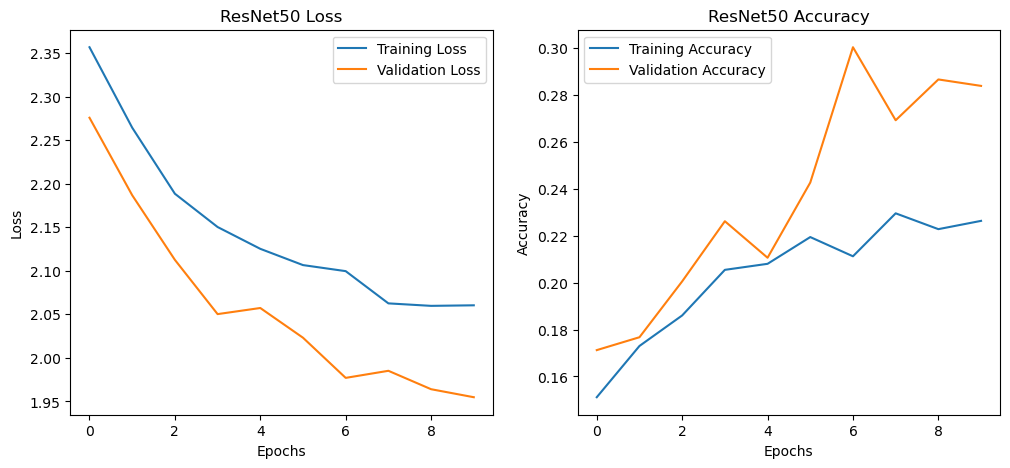

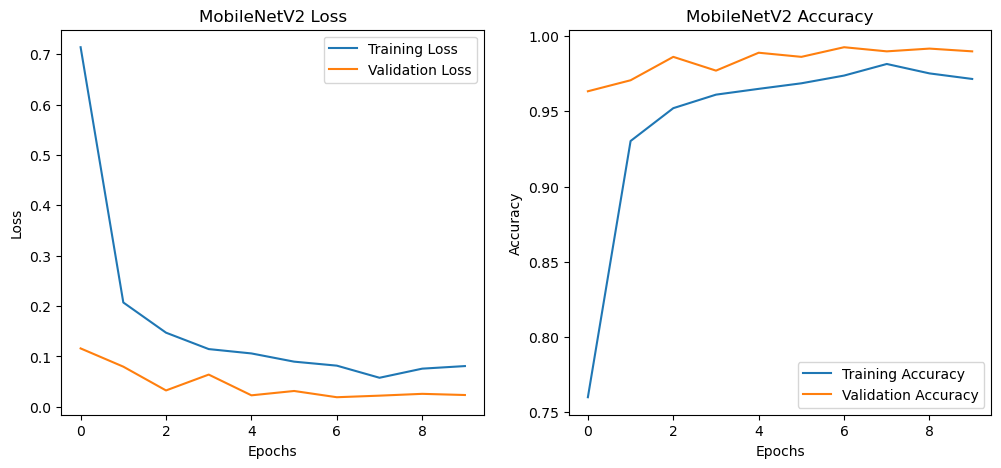

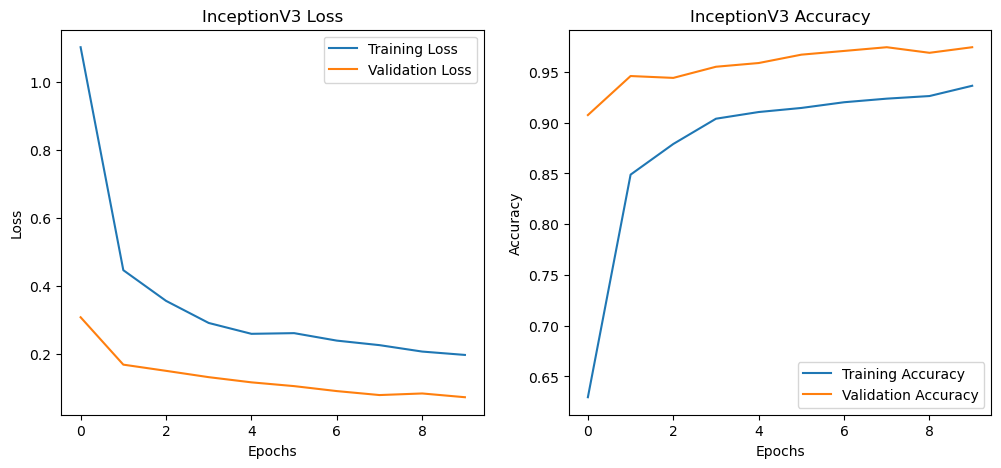

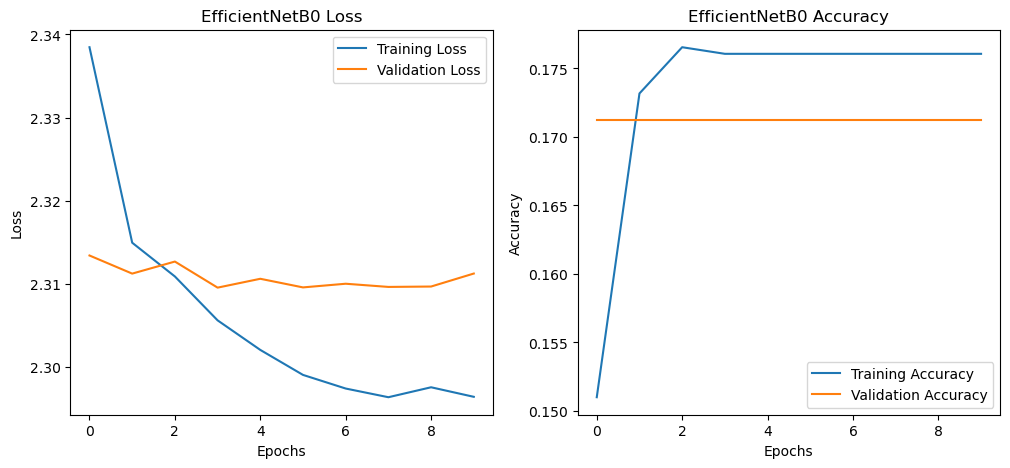

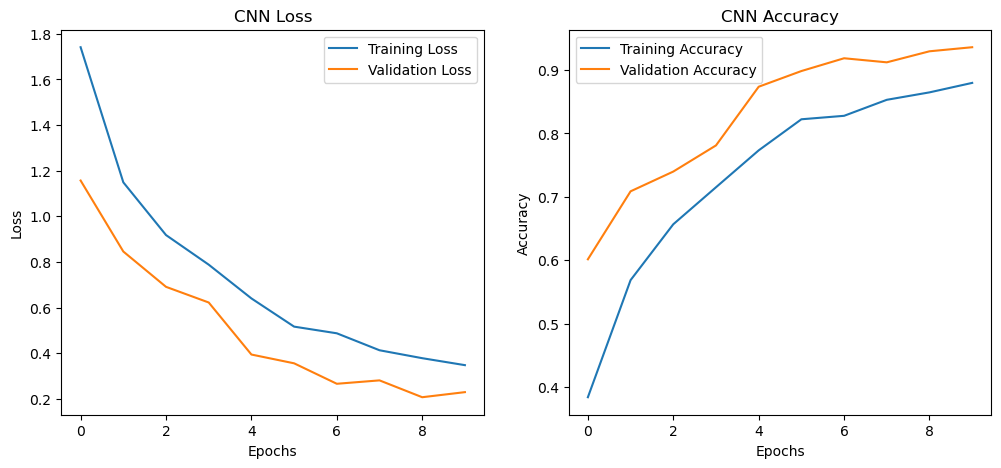

In [44]:
for name, hist in histories.items():
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(hist['loss'], label='Training Loss')
    plt.plot(hist['val_loss'], label='Validation Loss')
    plt.title(f'{name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(hist['accuracy'], label='Training Accuracy')
    plt.plot(hist['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Summarize Metrics in a Table

In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_list = []

for name, model in trained_models.items():
    y_pred = get_predictions(model, val_data)
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    })

metrics_df = pd.DataFrame(metrics_list)
print(metrics_df.sort_values(by='Accuracy', ascending=False))


c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


            Model  Accuracy  Precision    Recall  F1-Score
2     MobileNetV2  0.989927   0.990234  0.989927  0.989712
0           VGG16  0.985348   0.976710  0.985348  0.980896
3     InceptionV3  0.974359   0.974994  0.974359  0.971143
5             CNN  0.935897   0.929847  0.935897  0.931412
1        ResNet50  0.283883   0.194915  0.283883  0.207402
4  EfficientNetB0  0.171245   0.029325  0.171245  0.050075


c:\Users\Malathi M\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
